# Day 5 "Hydrothermal Venture"

## Part 1

### Problem

You come across a field of hydrothermal vents on the ocean floor! These vents constantly produce large, opaque clouds, so it would be best to avoid them if possible.

They tend to form in lines; the submarine helpfully produces a list of nearby lines of vents (your puzzle input) for you to review. For example:

        0,9 -> 5,9
        8,0 -> 0,8
        9,4 -> 3,4
        2,2 -> 2,1
        7,0 -> 7,4
        6,4 -> 2,0
        0,9 -> 2,9
        3,4 -> 1,4
        0,0 -> 8,8
        5,5 -> 8,2

Each line of vents is given as a line segment in the format x1,y1 -> x2,y2 where x1,y1 are the coordinates of one end the line segment and x2,y2 are the coordinates of the other end. These line segments include the points at both ends. In other words:

* An entry like 1,1 -> 1,3 covers points 1,1, 1,2, and 1,3.
* An entry like 9,7 -> 7,7 covers points 9,7, 8,7, and 7,7.

For now, only consider horizontal and vertical lines: lines where either x1 = x2 or y1 = y2.

So, the horizontal and vertical lines from the above list would produce the following diagram:

        .......1..
        ..1....1..
        ..1....1..
        .......1..
        .112111211
        ..........
        ..........
        ..........
        ..........
        222111....

In this diagram, the top left corner is 0,0 and the bottom right corner is 9,9. Each position is shown as the number of lines which cover that point or . if no line covers that point. The top-left pair of 1s, for example, comes from 2,2 -> 2,1; the very bottom row is formed by the overlapping lines 0,9 -> 5,9 and 0,9 -> 2,9.

To avoid the most dangerous areas, you need to determine the number of points where at least two lines overlap. In the above example, this is anywhere in the diagram with a 2 or larger - a total of 5 points.

Consider only horizontal and vertical lines. At how many points do at least two lines overlap?

### Setup

Parse and style. Data model is a simple array.

In [206]:
from utils import *

_sample = '''
    0,9 -> 5,9
    8,0 -> 0,8
    9,4 -> 3,4
    2,2 -> 2,1
    7,0 -> 7,4
    6,4 -> 2,0
    0,9 -> 2,9
    3,4 -> 1,4
    0,0 -> 8,8
    5,5 -> 8,2'''

_input = initDay("day5")

plotStyle({
    'axes.prop_cycle': mpl.cycler('color', ['8dd3c7']),
    'axes.titlelocation': 'center',
})

class Board:
    def __init__(self, text):
        nums = [int(v) for v in re.findall('\d+', text)]
        self.cx, self.cy = max(nums[::2])+1, max(nums[1::2])+1
        self.grid = [0] * self.cx*self.cy
        self.lines = [v for v in zip(*[iter(nums)]*4)]

    def dump(self):
        for off in range(0, len(self.grid), self.cx):
            row = self.grid[off:off+self.cx]
            print(''.join([str(v) if v != 0 else '.' for v in row]))

    def get(self, x, y):
        return self.grid[y*self.cx+x]

    def plot(self, diags, title):
        plt.figure(figsize = (9,9) if len(self.lines) > 10 else (4,4))
        plt.gca().axes.set_xlim([0, self.cx])
        plt.gca().axes.set_ylim([0, self.cy])
        plt.title('   ' + title)
        plotInvertY(-.08)

        markers = [[] for _ in range(4)]
        for x, y in [(x, y) for y in range(self.cy) for x in range(self.cx)]:
            if (c := self.get(x, y)) >= 2:
                markers[c-2].append((x, y))

        colors = ['green', 'orange', 'yellow', 'white']
        for i, marker in enumerate(markers):
            if len(marker) != 0:
                plt.scatter([v[0] for v in marker], [v[1] for v in marker], s=(i+1)*15, c=colors[i])

### Solution

Not much to do here. For each line, walk from start to end and increment cells for each point visited. Count and return the number of cells visited more than once. Diagonals are skipped in Part 1.

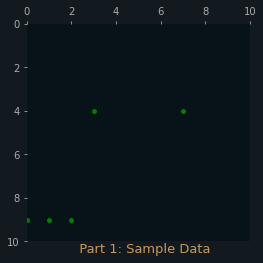

In [207]:
def solve(board, diags):
    for x, y, x2, y2 in board.lines:
        dx = (1 if x2 > x else -1) if x != x2 else 0
        dy = (1 if y2 > y else -1) if y != y2 else 0
        if diags or dx == 0 or dy == 0:
            while True:
                board.grid[board.cx*y+x] += 1
                if (x, y) == (x2, y2):
                    break
                x, y = x+dx, y+dy
    return sum([1 if c > 1 else 0 for c in board.grid])

def solve1(board):
    return solve(board, False)

check(solve1(sampleBoard1 := Board(_sample)), 5)
sampleBoard1.plot(False, "Part 1: Sample Data")

Part 1 Result: 5774


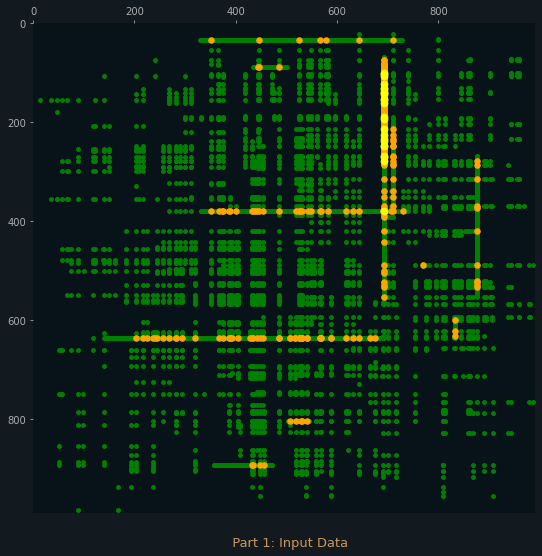

In [208]:
check1(solve1(inputBoard1 := Board(_input)))
inputBoard1.plot(True, "Part 1: Input Data")

## Part 2

### Problem

Unfortunately, considering only horizontal and vertical lines doesn't give you the full picture; you need to also consider diagonal lines.

Because of the limits of the hydrothermal vent mapping system, the lines in your list will only ever be horizontal, vertical, or a diagonal line at exactly 45 degrees. In other words:

* An entry like 1,1 -> 3,3 covers points 1,1, 2,2, and 3,3.
* An entry like 9,7 -> 7,9 covers points 9,7, 8,8, and 7,9.

Considering all lines from the above example would now produce the following diagram:

        1.1....11.
        .111...2..
        ..2.1.111.
        ...1.2.2..
        .112313211
        ...1.2....
        ..1...1...
        .1.....1..
        1.......1.
        222111....

You still need to determine the number of points where at least two lines overlap. In the above example, this is still anywhere in the diagram with a 2 or larger - now a total of 12 points.

Consider all of the lines. At how many points do at least two lines overlap?

### Solution

Here we simply allow diagonals in the general solution.

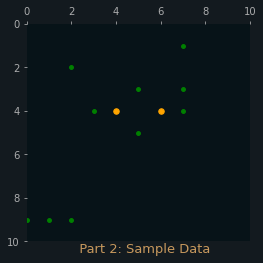

In [209]:
def solve2(board):
    return solve(board, True)

check(solve2(sampleBoard2 := Board(_sample)), 12)
sampleBoard2.plot(False, "Part 2: Sample Data")

Part 2 Result: 18423


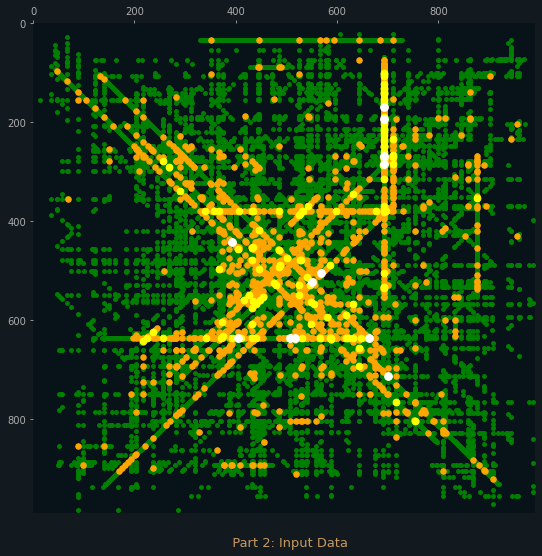

In [210]:
check2(solve2(inputBoard2 := Board(_input)))
inputBoard2.plot(True, "Part 2: Input Data")